1.1. Import modułów (należy zaimportować klasę LinearRegression z biblioteki
sklearn.linear_model).
1.2. Otwarcie pliku z danymi. Należy zaimportować nazwy kolumn i stworzyć obiekt housing_housing_housing_housing_housing_housing_df.
1.3. Sprawdzenie podstawowych statystyk.
1.4. Sprawdzenie kompletności danych.
1.5. Czy typy danych są akceptowalne?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

housing_df = pd.read_csv('housing.csv', header=None, delim_whitespace=True)

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
                'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_df.columns = column_names

print("Podstawowe statystyki zbioru danych:")
print(housing_df.describe())


Podstawowe statystyki zbioru danych:
             CRIM          ZN       INDUS        CHAS         NOX          RM   
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  \
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B   
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  \
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.

In [7]:
print("\nPodstawowe statystyki zbioru danych:")
print(housing_df.describe())


Podstawowe statystyki zbioru danych:
             CRIM          ZN       INDUS        CHAS         NOX          RM   
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  \
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B   
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  \
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356

In [ ]:
print("\nSprawdzenie kompletności danych:")
print(housing_df.isnull().sum())

In [ ]:
print("\nTypy danych w zbiorze:")
print(housing_df.dtypes)

1.6. Należy stworzyć wykresy pudełkowe dla wszystkich kolumn.

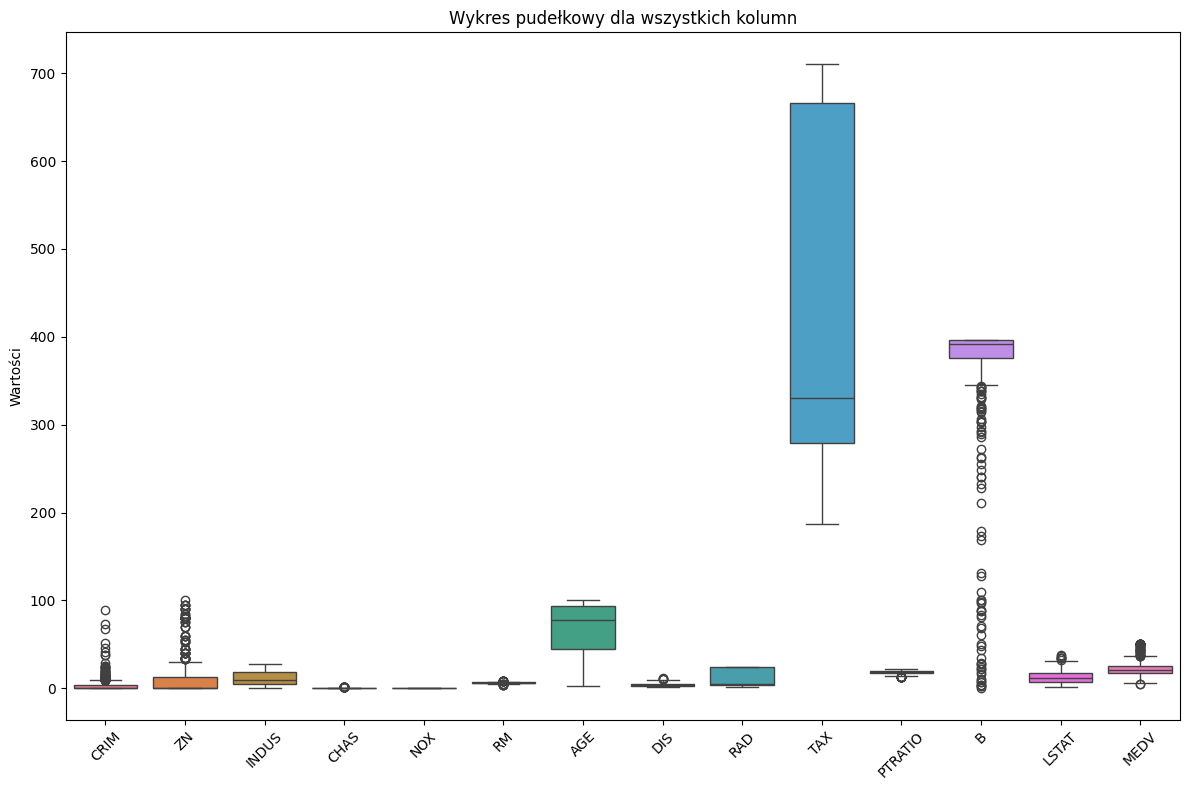

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Wykres pudełkowy dla wszystkich kolumn')
plt.ylabel('Wartości')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  

1.7. Korzystając z metody IQR, czyli rozstępu międzykwartylowego, należy wyznaczyć %
wartości odstających dla każdej z kolumn. Dana wartość jest traktowana jako odstająca, gdy
xi < Q1 - 1.5 · IQR (wartość za mała) lub xi > Q3 +1.5 · IQR (wartość za duża).

In [10]:
outlier_percentage = {}

for column in housing_df.columns:
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1 
    
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR  
    
    outliers = housing_df[(housing_df[column] < lower_bound) | (housing_df[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    
    total_count = housing_df.shape[0] 
    outlier_percentage[column] = (outlier_count / total_count) * 100 

print("\nProcent wartości odstających dla każdej kolumny:")
for column, percentage in outlier_percentage.items():
    print(f"{column}: {percentage:.2f}%")



Procent wartości odstających dla każdej kolumny:
CRIM: 13.04%
ZN: 13.44%
INDUS: 0.00%
CHAS: 6.92%
NOX: 0.00%
RM: 5.93%
AGE: 0.00%
DIS: 0.99%
RAD: 0.00%
TAX: 0.00%
PTRATIO: 2.96%
B: 15.22%
LSTAT: 1.38%
MEDV: 7.91%


1.8. Należy utworzyć macierz korelacji dla wszystkich cech. Następnie należy narysować
wykres przedstawiający tę macierz (można skorzystać z sns.heatmap).

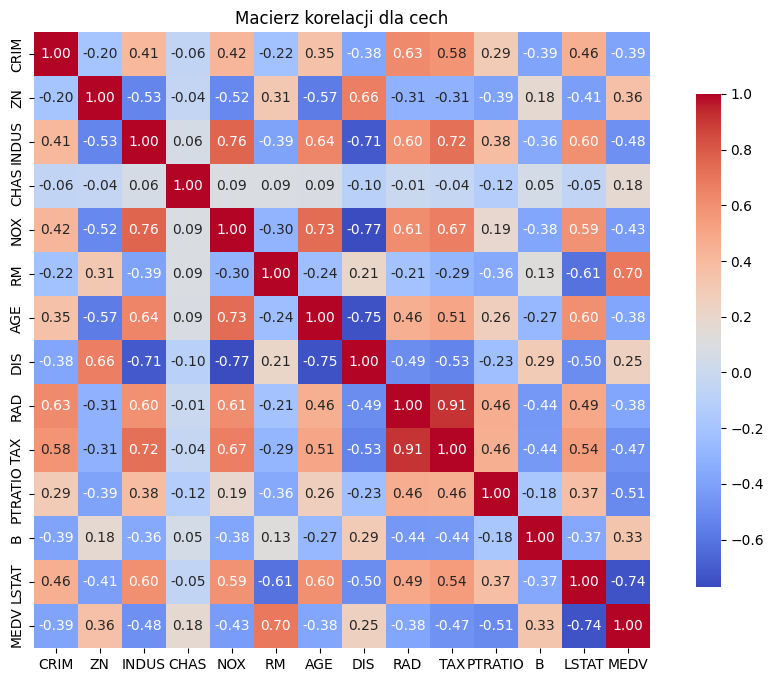

In [2]:
correlation_matrix = housing_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Macierz korelacji dla cech')
plt.show()


1.9. Wykres pairplot dla wszystkich kolumn.

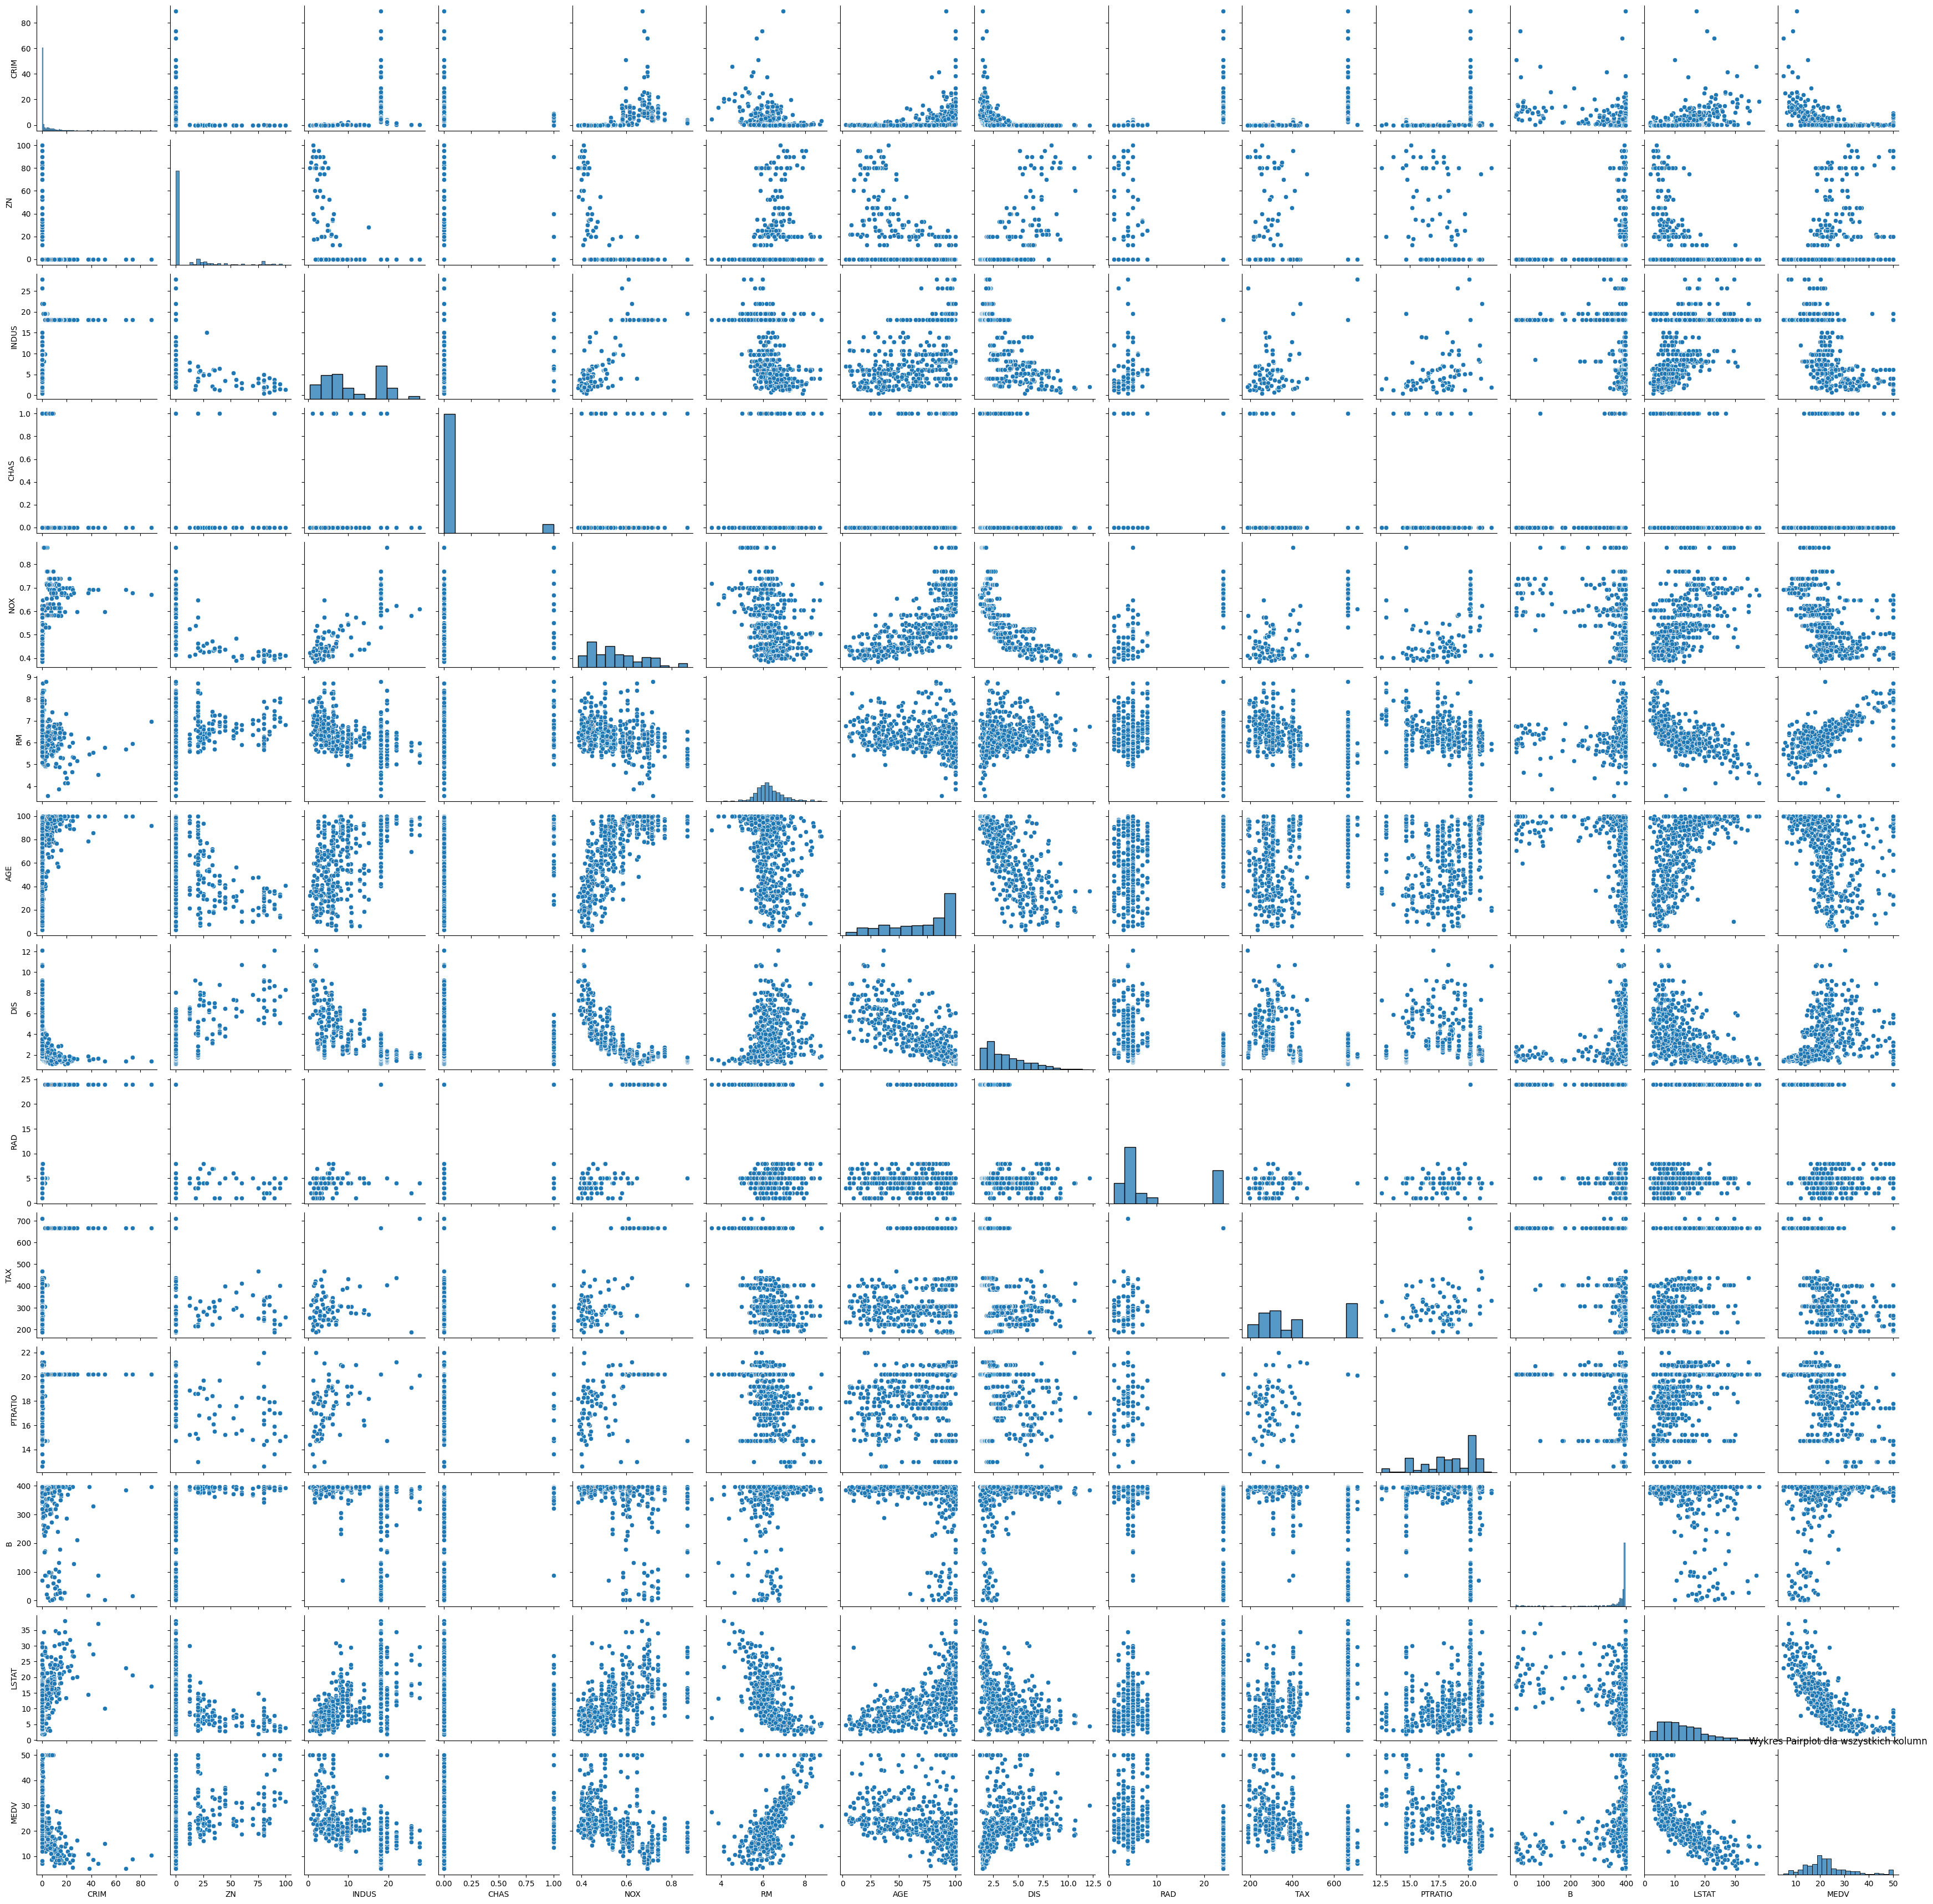

In [3]:
sns.pairplot(housing_df)
plt.title('Wykres Pairplot dla wszystkich kolumn')
plt.show()


1.10. Należy stworzyć obiekt df_selected, który będzie zawierać najbardziej skorelowane cechy
o współczynniku korelacji <-0.5 oraz >0.5. Należy narysować wykres pairplot.

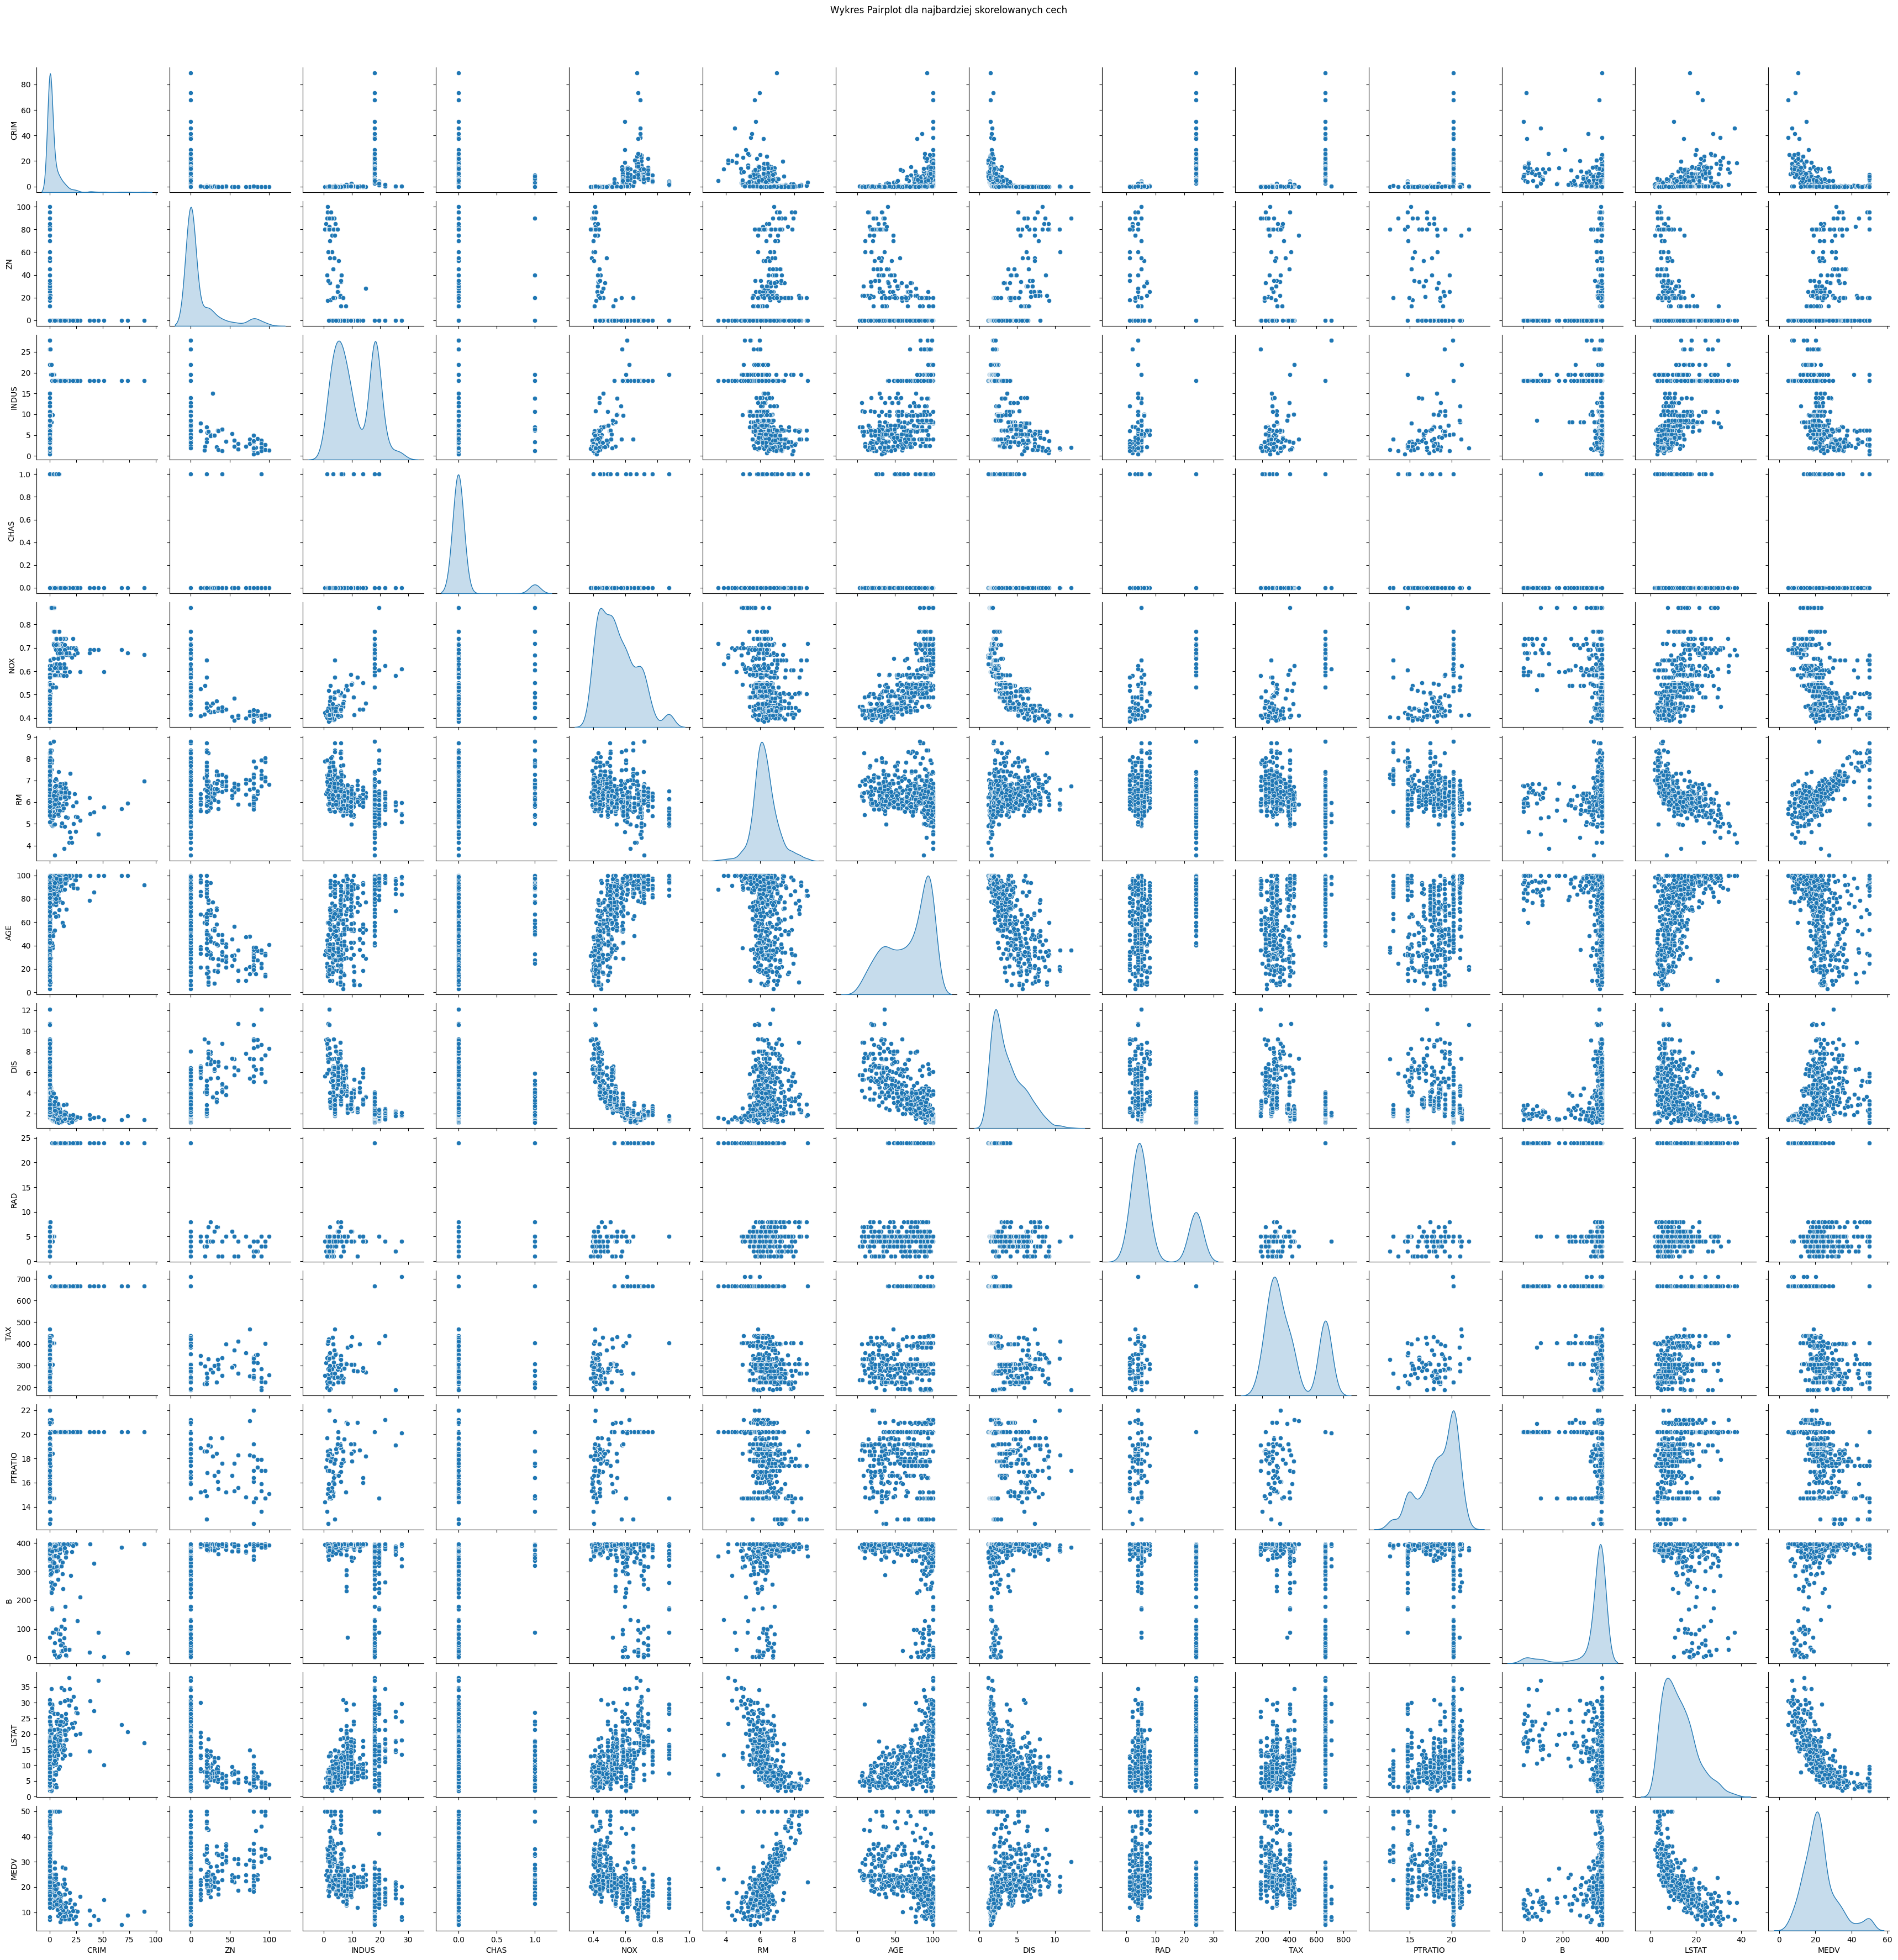

In [4]:
correlation_matrix = housing_df.corr()

selected_features = correlation_matrix.columns[(correlation_matrix.abs() > 0.5).any(axis=0)]

df_selected = housing_df[selected_features]

sns.pairplot(df_selected, diag_kind='kde')
plt.suptitle('Wykres Pairplot dla najbardziej skorelowanych cech', y=1.02)
plt.show()


1.11. Do zmiennej X należy zapisać wszystkie kolumny (13) z zestawu danych (macierz cech)
oprócz kolumny MEDV (można skorzystać z metody drop z argumentem axis=1).
1.12. Do zmiennej y należy zapisać dane z kolumny MEDV.

In [7]:
X = housing_df.drop(columns=['MEDV'], axis=1)

y = housing_df['MEDV']



1.13. Do zmiennych X_train, X_test, y_train, y_test należy zapisać dane powstałe z podziału X
i y na dane uczące i testowe (z biblioteki sklearn.model_selection należy zaimportować
train_test_split). Zbiór testowy ma stanowić 20% zbioru danych, a random_state = 101.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


1.14. Należy stworzyć obiekt regresji liniowej model. Dla obiektu model należy wywołać
metodę fit(), która ma nauczyć model w jaki sposób odgadywać wartość nieruchomości w
oparciu dane społeczno-gospodarcze na zbiorze treningowym.
Wyniki obliczeń są zapisywane w atrybutach modelu. W Scikit-Learn wszystkie
parametry, których wartości zostały ustalone poprzez wywołanie fit, zawierają na końcu
nazw symbol podkreślenia.
Np. dla regresji liniowej pojedynczej zmiennej:
model.coef_ - nachylenie,
model.intercept_ - punkt przecięcia prostej dopasowanej do zbioru danych.

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

1.15. Należy wyświetlić wartości współczynników dopasowania. Jak interpretować wartości
poszczególnych współczynników?

In [10]:
print("Współczynniki:", model.coef_)
print("Punkt przecięcia:", model.intercept_)


Współczynniki: [-9.89913563e-02  4.25047578e-02  1.67390094e-02  3.06437882e+00
 -1.56462528e+01  4.01888422e+00 -8.31558474e-04 -1.44628034e+00
  2.67827281e-01 -1.04725485e-02 -8.88651815e-01  8.25262805e-03
 -5.49367192e-01]
Punkt przecięcia: 32.906130908637294


1.16. W zmiennej y_pred należy zapisać wynik predykcji dla X_test.

In [11]:
y_pred = model.predict(X_test)


1.17. Należy wyświetlić wykres punktowy y_test vs y_pred.

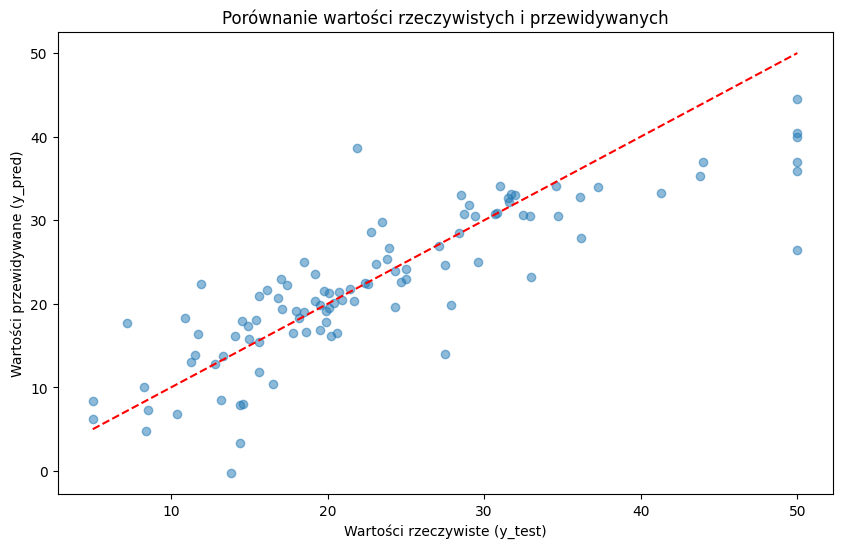

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.title('Porównanie wartości rzeczywistych i przewidywanych')
plt.xlabel('Wartości rzeczywiste (y_test)')
plt.ylabel('Wartości przewidywane (y_pred)')
plt.show()


1.18. Ewaluacja modelu, czyli należy wyznaczyć wartość MAE, MSE, RMSE, R2

(z biblioteki

sklearn.metrics należy zaimportować odpowiednie wskaźniki wydajności).


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')


MAE: 3.9994042530538887
MSE: 33.26891855791986
RMSE: 5.76792151107484
R²: 0.7034623076515885


c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.19. Należy zastosować regularyzacje (z biblioteki sklearn.linear_model należy zaimportować
Ridge, Lasso, ElasticNet).
1.19.1. Regresja grzbietowa (współczynnik regularyzacji, alpha = 0.5). Należy stworzyć
obiekt ridge. Dla obiektu ridge należy wywołać metodę fit(). Należy wyświetlić
wartości współczynników dopasowania. W zmiennej y_pred należy zapisać wynik
predykcji dla X_test. Należy przeprowadzić ewaluację modelu ridge jak w 1.18.
1.19.2. Regresja metodą lasso (współczynnik regularyzacji, alpha = 0.5). Należy
stworzyć obiekt lasso i dalej postępować jak w 1.19.1.
1.19.3. Regresja elastycznej siatki (współczynnik regularyzacji, alpha = 0.5, l1_ratio =
0.5). Należy stworzyć obiekt elastic i dalej postępować jak w 1.19.1.

In [14]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

alpha_ridge = 0.5
ridge = Ridge(alpha=alpha_ridge)
ridge.fit(X_train, y_train)

print("Współczynniki Ridge:", ridge.coef_)
y_pred_ridge = ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'\nEwaluacja modelu Ridge:')
print(f'MAE: {mae_ridge}')
print(f'MSE: {mse_ridge}')
print(f'RMSE: {rmse_ridge}')
print(f'R²: {r2_ridge}')

# 1.19.2 Regresja Lasso

alpha_lasso = 0.5
lasso = Lasso(alpha=alpha_lasso)
lasso.fit(X_train, y_train)

print("\nWspółczynniki Lasso:", lasso.coef_)
y_pred_lasso = lasso.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'\nEwaluacja modelu Lasso:')
print(f'MAE: {mae_lasso}')
print(f'MSE: {mse_lasso}')
print(f'RMSE: {rmse_lasso}')
print(f'R²: {r2_lasso}')

# 1.19.3 ElasticNet
alpha_elastic = 0.5
l1_ratio = 0.5
elastic = ElasticNet(alpha=alpha_elastic, l1_ratio=l1_ratio)
elastic.fit(X_train, y_train)

print("\nWspółczynniki ElasticNet:", elastic.coef_)
y_pred_elastic = elastic.predict(X_test)

mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = mean_squared_error(y_test, y_pred_elastic, squared=False)
r2_elastic = r2_score(y_test, y_pred_elastic)

print(f'\nEwaluacja modelu ElasticNet:')
print(f'MAE: {mae_elastic}')
print(f'MSE: {mse_elastic}')
print(f'RMSE: {rmse_elastic}')
print(f'R²: {r2_elastic}')


Współczynniki Ridge: [-9.79174176e-02  4.31536763e-02 -2.23126264e-04  3.03379451e+00
 -1.11122248e+01  4.04715476e+00 -5.10395997e-03 -1.37586671e+00
  2.58361218e-01 -1.08329348e-02 -8.38753714e-01  8.49360315e-03
 -5.53909663e-01]

Ewaluacja modelu Ridge:
MAE: 4.007559223366921
MSE: 33.59955651751764
RMSE: 5.7965124443511415
R²: 0.7005152140341264

Współczynniki Lasso: [-0.07385044  0.04391038 -0.          0.         -0.          2.56297452
  0.00532411 -0.92003387  0.2498994  -0.01330698 -0.72102617  0.00856959
 -0.68793799]

Ewaluacja modelu Lasso:
MAE: 4.136832959463832
MSE: 35.361107199079306
RMSE: 5.946520596035913
R²: 0.6848138868883206

Współczynniki ElasticNet: [-0.0828387   0.04892706 -0.01922987  0.         -0.          1.73110822
  0.01089852 -0.97365677  0.2866926  -0.01424991 -0.76800059  0.00805186
 -0.7446993 ]

Ewaluacja modelu ElasticNet:
MAE: 4.181734079686131
MSE: 36.037344521924815
RMSE: 6.003111236844176
R²: 0.6787863433465201


c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.20. Do zmiennej X_selected należy zapisać kolumny 'RM', 'PTRATIO', 'LSTAT' (na
podstawie analizy z zadania 1.8.-1.10.), a do zmiennej y należy zapisać dane z kolumny MEDV.
Następnie należy wykonać kroki od 1.13 do 1.19.

Współczynniki regresji: [ 4.69352307 -0.8690665  -0.56555801]
Punkt przecięcia: 16.050406182326242


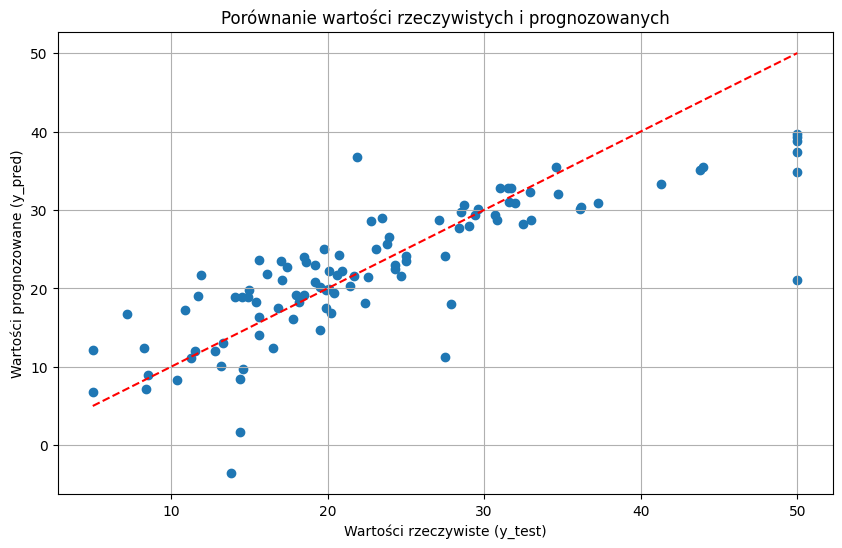


Ewaluacja modelu:
MAE: 4.293031599041228
MSE: 39.52431488911285
RMSE: 6.286836636108246
R²: 0.647705737459886

Współczynniki Ridge: [ 4.67336013 -0.86963862 -0.56666171]

Ewaluacja modelu Ridge:
MAE: 4.293416194723452
MSE: 39.51516186026674
RMSE: 6.286108642098602
R²: 0.6477873216582813

Współczynniki Lasso: [ 3.09328513 -0.82141781 -0.65559482]

Ewaluacja modelu Lasso:
MAE: 4.368567342414874
MSE: 40.03355538896732
RMSE: 6.3272075506472305
R²: 0.643166695939366

Współczynniki ElasticNet: [ 2.10117737 -0.86827762 -0.7097906 ]

Ewaluacja modelu ElasticNet:
MAE: 4.438257326406054
MSE: 41.05707328593244
RMSE: 6.407579362437303
R²: 0.6340437172433518


c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: Futu

In [15]:
# 1.20. Wybór kolumn
X_selected = housing_df[['RM', 'PTRATIO', 'LSTAT']]
y = housing_df['MEDV']

# 1.13. Podział danych na dane uczące i testowe
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=101)

# 1.14. Stworzenie obiektu regresji liniowej
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Wartości współczynników dopasowania
print("Współczynniki regresji:", model.coef_)
print("Punkt przecięcia:", model.intercept_)

# 1.16. Predykcja
y_pred = model.predict(X_test)

# 1.17. Wykres punktowy y_test vs y_pred
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Porównanie wartości rzeczywistych i prognozowanych')
plt.xlabel('Wartości rzeczywiste (y_test)')
plt.ylabel('Wartości prognozowane (y_pred)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # linia idealna
plt.grid()
plt.show()

# 1.18. Ewaluacja modelu
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'\nEwaluacja modelu:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# 1.19.1 Regresja grzbietowa (Ridge)
from sklearn.linear_model import Ridge

alpha_ridge = 0.5
ridge = Ridge(alpha=alpha_ridge)
ridge.fit(X_train, y_train)

# Wartości współczynników dopasowania
print("\nWspółczynniki Ridge:", ridge.coef_)
y_pred_ridge = ridge.predict(X_test)

# Ewaluacja modelu Ridge
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'\nEwaluacja modelu Ridge:')
print(f'MAE: {mae_ridge}')
print(f'MSE: {mse_ridge}')
print(f'RMSE: {rmse_ridge}')
print(f'R²: {r2_ridge}')

# 1.19.2 Regresja Lasso
from sklearn.linear_model import Lasso

alpha_lasso = 0.5
lasso = Lasso(alpha=alpha_lasso)
lasso.fit(X_train, y_train)

# Wartości współczynników dopasowania
print("\nWspółczynniki Lasso:", lasso.coef_)
y_pred_lasso = lasso.predict(X_test)

# Ewaluacja modelu Lasso
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'\nEwaluacja modelu Lasso:')
print(f'MAE: {mae_lasso}')
print(f'MSE: {mse_lasso}')
print(f'RMSE: {rmse_lasso}')
print(f'R²: {r2_lasso}')

# 1.19.3 Regresja Elastyczna Siatka (ElasticNet)
from sklearn.linear_model import ElasticNet

alpha_elastic = 0.5
l1_ratio = 0.5
elastic = ElasticNet(alpha=alpha_elastic, l1_ratio=l1_ratio)
elastic.fit(X_train, y_train)

# Wartości współczynników dopasowania
print("\nWspółczynniki ElasticNet:", elastic.coef_)
y_pred_elastic = elastic.predict(X_test)

# Ewaluacja modelu ElasticNet
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = mean_squared_error(y_test, y_pred_elastic, squared=False)
r2_elastic = r2_score(y_test, y_pred_elastic)

print(f'\nEwaluacja modelu ElasticNet:')
print(f'MAE: {mae_elastic}')
print(f'MSE: {mse_elastic}')
print(f'RMSE: {rmse_elastic}')
print(f'R²: {r2_elastic}')


Zadanie 2

2.1. Z biblioteki sklearn.preprocessing należy zaimportować StandardScaler. Standaryzacja
danych w zadaniu 2 ma być przeprowadzona na wszystkich kolumnach z pierwotnego zestawu
danych (z zadania 1.11).

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(housing_df.drop('MEDV', axis=1))

scaled_columns = housing_df.columns[:-1]
X_scaled_df = pd.DataFrame(X_scaled, columns=scaled_columns)

print(X_scaled_df.head())



       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE   
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  \
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  


2.2. Należy stworzyć obiekt scaler, który będzie służył do standaryzacji danych:
scaler = StandardScaler()

In [18]:
scaler = StandardScaler()

2.3. Następnie dla obiektu scaler należy wywołać metodę fit, która dopasuje model do danych
treningowych. WAŻNE !!! Trenowanie odbywa się na tylko na macierzy cech (X_train):
scaler.fit(X_train)

In [19]:
scaler.fit(X_train)

StandardScaler()

2.4. Następnie oryginalny treningowy zestaw cech zostanie przekształcony przy użyciu metody
transform():
scaled_X_train = scaler.transform(X_train)
2.5. Należy również przekształcić testowy zestaw cech (X_test) za pomocą transform:
scaled_X_test = scaler.transform(X_test)

In [20]:
scaled_X_train = scaler.transform(X_train)

scaled_X_test = scaler.transform(X_test)


2.6. Stworzenie i trenowanie modelu:
std_model.fit(scaled_X_train, y_train)
2.7. Należy wyświetlić wartości współczynników dopasowania.

In [21]:
std_model = LinearRegression()

std_model.fit(scaled_X_train, y_train)

print("Współczynniki:", std_model.coef_)
print("Punkt przecięcia:", std_model.intercept_)


Współczynniki: [ 3.15775107 -1.86589562 -3.86607522]
Punkt przecięcia: 22.336881188118813


2.8. W zmiennej y_pred należy zapisać wynik predykcji dla scaled_X_test.

In [22]:
y_pred = std_model.predict(scaled_X_test)

2.9. Wykres punktowy scaled_X_test vs y_test z naniesioną krzywą regresji.

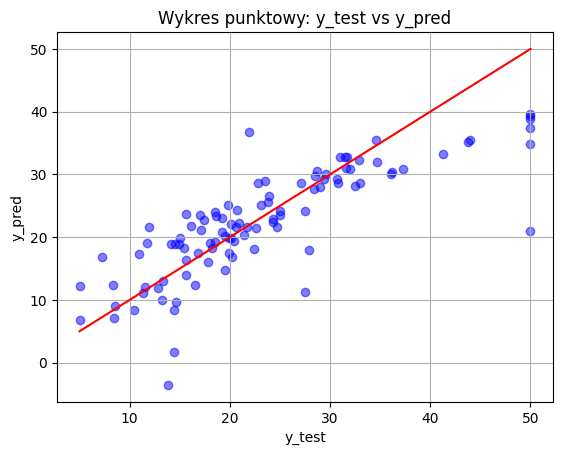

In [39]:

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

x_values = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(x_values, x_values, color='red', linestyle='-')

plt.title('Wykres punktowy: y_test vs y_pred z krzywą regresji')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid()
plt.show()


2.10. Ewaluacja modelu. Jaka jest różnica między przewidywanymi etykietami dla zbioru
testowego, a rzeczywistymi wartościami? Czy uzyskane wyniki różnią się w porównaniu do
danych nieprzekształconych?
Ewaluacja modelu regresji liniowej oraz modeli z regularyzacją (Ridge, Lasso, ElasticNet) wskazuje, że wyniki są stosunkowo zbliżone, jednak modele różnią się pod względem dokładności przewidywań.

In [35]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Ewaluacja modelu:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Ewaluacja modelu:
MAE: 4.293031599041228
MSE: 39.52431488911285
RMSE: 6.286836636108246
R²: 0.647705737459886


c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
ridge = Ridge(alpha=0.5)
ridge.fit(scaled_X_train, y_train)
y_pred_ridge = ridge.predict(scaled_X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ewaluacja modelu Ridge:")
print(f"MAE: {mae_ridge}")
print(f"MSE: {mse_ridge}")
print(f"RMSE: {rmse_ridge}")
print(f"R²: {r2_ridge}")


Ewaluacja modelu Ridge:
MAE: 4.2928242134378465
MSE: 39.52446233687912
RMSE: 6.2868483628030285
R²: 0.6477044232055535


c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
lasso = Lasso(alpha=0.5)
lasso.fit(scaled_X_train, y_train)
y_pred_lasso = lasso.predict(scaled_X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Ewaluacja modelu Lasso:")
print(f"MAE: {mae_lasso}")
print(f"MSE: {mse_lasso}")
print(f"RMSE: {rmse_lasso}")
print(f"R²: {r2_lasso}")


Ewaluacja modelu Lasso:
MAE: 4.3646379266597295
MSE: 40.26284129223512
RMSE: 6.345300725122106
R²: 0.6411229892127803


c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [38]:
elastic = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic.fit(scaled_X_train, y_train)
y_pred_elastic = elastic.predict(scaled_X_test)

mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = mean_squared_error(y_test, y_pred_elastic, squared=False)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("Ewaluacja modelu ElasticNet:")
print(f"MAE: {mae_elastic}")
print(f"MSE: {mse_elastic}")
print(f"RMSE: {rmse_elastic}")
print(f"R²: {r2_elastic}")

Ewaluacja modelu ElasticNet:
MAE: 4.437728277871138
MSE: 41.43186074375107
RMSE: 6.436758558758521
R²: 0.6307031034608757


c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2.11. Należy zastosować regularyzację jak w zadaniu 1.19.

In [27]:
#Regresja Ridge
ridge = Ridge(alpha=0.5)
ridge.fit(scaled_X_train, y_train)

print("Współczynniki regresji Ridge:")
print(ridge.coef_)

y_pred_ridge = ridge.predict(scaled_X_test)


mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nEwaluacja modelu regresji Ridge:")
print(f"MAE: {mae_ridge:.2f}")
print(f"MSE: {mse_ridge:.2f}")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R^2: {r2_ridge:.2f}")


# Regresja Lasso
lasso = Lasso(alpha=0.5)
lasso.fit(scaled_X_train, y_train)

print("\nWspółczynniki regresji Lasso:")
print(lasso.coef_)

y_pred_lasso = lasso.predict(scaled_X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nEwaluacja modelu regresji Lasso:")
print(f"MAE: {mae_lasso:.2f}")
print(f"MSE: {mse_lasso:.2f}")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R^2: {r2_lasso:.2f}")

# Regresja elastycznej siatki
elastic = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic.fit(scaled_X_train, y_train)

print("\nWspółczynniki regresji elastycznej siatki:")
print(elastic.coef_)

y_pred_elastic = elastic.predict(scaled_X_test)

mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("\nEwaluacja modelu regresji elastycznej siatki:")
print(f"MAE: {mae_elastic:.2f}")
print(f"MSE: {mse_elastic:.2f}")
print(f"RMSE: {rmse_elastic:.2f}")
print(f"R^2: {r2_elastic:.2f}")



Współczynniki regresji grzbietowej:
[ 3.15616977 -1.86567735 -3.86233433]

Ewaluacja modelu regresji grzbietowej:
MAE: 4.29
MSE: 39.52
RMSE: 6.29
R^2: 0.65

Współczynniki regresji Lasso:
[ 2.90028536 -1.54480418 -3.65203441]

Ewaluacja modelu regresji Lasso:
MAE: 4.36
MSE: 40.26
RMSE: 6.35
R^2: 0.64

Współczynniki regresji elastycznej siatki:
[ 2.72144764 -1.6424067  -3.17565368]

Ewaluacja modelu regresji elastycznej siatki:
MAE: 4.44
MSE: 41.43
RMSE: 6.44
R^2: 0.63


2.12. Zbudować modele regresji liniowej, grzbietowej, lasso i elastycznej siatki dla
zeskalowanych wybranych cech: RM, PTRATIO, LSTAT.

In [28]:
X_selected = housing_df[['RM', 'PTRATIO', 'LSTAT']]
y_selected = housing_df['MEDV']


X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_selected, test_size=0.2, random_state=101)


scaler_selected = StandardScaler()
scaler_selected.fit(X_train_selected)

scaled_X_train_selected = scaler_selected.transform(X_train_selected)
scaled_X_test_selected = scaler_selected.transform(X_test_selected)


In [29]:
# Regresja liniowa
linear_model_selected = LinearRegression()
linear_model_selected.fit(scaled_X_train_selected, y_train_selected)

y_pred_linear_selected = linear_model_selected.predict(scaled_X_test_selected)

print("Współczynniki regresji liniowej dla wybranych cech:")
print(linear_model_selected.coef_)


Współczynniki regresji liniowej dla wybranych cech:
[ 3.15775107 -1.86589562 -3.86607522]


In [30]:
# Regresja Ridge
ridge_selected = Ridge(alpha=0.5)
ridge_selected.fit(scaled_X_train_selected, y_train_selected)

y_pred_ridge_selected = ridge_selected.predict(scaled_X_test_selected)

print("\nWspółczynniki regresji Ridge dla wybranych cech:")
print(ridge_selected.coef_)



Współczynniki regresji grzbietowej dla wybranych cech:
[ 3.15616977 -1.86567735 -3.86233433]


In [31]:
# Regresja Lasso
lasso_selected = Lasso(alpha=0.5)
lasso_selected.fit(scaled_X_train_selected, y_train_selected)

y_pred_lasso_selected = lasso_selected.predict(scaled_X_test_selected)

print("\nWspółczynniki regresji Lasso dla wybranych cech:")
print(lasso_selected.coef_)



Współczynniki regresji Lasso dla wybranych cech:
[ 2.90028536 -1.54480418 -3.65203441]


In [32]:
# Regresja elastycznej siatki
elastic_selected = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_selected.fit(scaled_X_train_selected, y_train_selected)

y_pred_elastic_selected = elastic_selected.predict(scaled_X_test_selected)

print("\nWspółczynniki regresji elastycznej siatki dla wybranych cech:")
print(elastic_selected.coef_)



Współczynniki regresji elastycznej siatki dla wybranych cech:
[ 2.72144764 -1.6424067  -3.17565368]


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\nEwaluacja modelu {model_name}:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2: {r2:.2f}")

# Ewaluacja modeli
evaluate_model(y_test_selected, y_pred_linear_selected, "Regresja liniowa")
evaluate_model(y_test_selected, y_pred_ridge_selected, "Regresja grzbietowa")
evaluate_model(y_test_selected, y_pred_lasso_selected, "Regresja Lasso")
evaluate_model(y_test_selected, y_pred_elastic_selected, "Regresja elastycznej siatki")



Ewaluacja modelu Regresja liniowa:
MAE: 4.29
MSE: 39.52
RMSE: 6.29
R^2: 0.65

Ewaluacja modelu Regresja grzbietowa:
MAE: 4.29
MSE: 39.52
RMSE: 6.29
R^2: 0.65

Ewaluacja modelu Regresja Lasso:
MAE: 4.36
MSE: 40.26
RMSE: 6.35
R^2: 0.64

Ewaluacja modelu Regresja elastycznej siatki:
MAE: 4.44
MSE: 41.43
RMSE: 6.44
R^2: 0.63
